# Summary

### Step 1: Exploratory Data Analysis
- 1.1: Importing Data and First Look
- 1.2: Checking Values
- 1.3: Sampling and Data Verification
- 1.4: Class Distribution Analysis

### Step 2: Data Wrangling
- 2.1: Creating "text_combined" Column
- 2.2: Processing Data
- 2.3: Checking the Results

# Step 1: Exploratory Data Analysis

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### 1.1: Importing Data and First Look

In [74]:
# Import dataset to be processed
ceas_df = pd.read_csv("CEAS_08.csv")

# Import dataset that will serve as an example for data processing
phishing_df = pd.read_csv("phishing_email.csv")

# Check dataset
ceas_df

,sender,receiver,date,subject,body,label,urls
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1
...,...,...,...,...,...,...,...
39149,CNN Alerts <charlene-detecton@btcmarketing.com>,email1007@gvc.ceas-challenge.cc,"Fri, 08 Aug 2008 10:34:50 -0400",CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1,0
39150,CNN Alerts <idgetily1971@careplusnj.org>,email104@gvc.ceas-challenge.cc,"Fri, 08 Aug 2008 10:35:11 -0400",CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1,0
39151,Abhijit Vyas <xpojhbz@gmail.com>,fxgmqwjn@triptracker.net,"Fri, 08 Aug 2008 22:00:43 +0800",Slideshow viewer,Hello there ! \nGreat work on the slide show v...,0,0
39152,Joseph Brennan <vupzesm@columbia.edu>,zqoqi@spamassassin.apache.org,"Fri, 08 Aug 2008 09:00:46 -0500",Note on 2-digit years,"\nMail from sender , coming from intuit.com\ns...",0,0


In [75]:
# Check basic information
ceas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39154 entries, 0 to 39153
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    39154 non-null  object
 1   receiver  38692 non-null  object
 2   date      39154 non-null  object
 3   subject   39126 non-null  object
 4   body      39154 non-null  object
 5   label     39154 non-null  int64 
 6   urls      39154 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.1+ MB


In [76]:
# Check dataset
phishing_df

,text_combined,label
0,hpl nom may 25 2001 see attached file hplno 52...,0
1,nom actual vols 24 th forwarded sabrae zajac h...,0
2,enron actuals march 30 april 1 201 estimated a...,0
3,hpl nom may 30 2001 see attached file hplno 53...,0
4,hpl nom june 1 2001 see attached file hplno 60...,0
...,...,...
82481,info advantageapartmentscom infoadvantageapart...,1
82482,monkeyorg helpdeskmonkeyorg monkeyorg hi josep...,1
82483,help center infohelpcentercoza_infohelpcenterc...,1
82484,metamask infosofamekarcom verify metamask wall...,1


In [77]:
# Check basic information
phishing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82486 entries, 0 to 82485
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text_combined  82486 non-null  object
 1   label          82486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


### 1.2: Checking Values

In [78]:
# Check null values
ceas_df.isnull().sum()

sender        0
receiver    462
date          0
subject      28
body          0
label         0
urls          0
dtype: int64

In [79]:
# Check unique values for a better understanding of the content.
colunas_verificar = ['label', 'urls']

for coluna in colunas_verificar:
    valores_unicos = ceas_df[coluna].unique()
    print(f"Valores únicos na coluna'{coluna}':'{valores_unicos}'")

Valores únicos na coluna'label':'[1 0]'
Valores únicos na coluna'urls':'[1 0]'


### 1.3: Sampling and Data Verification

In [80]:
# Select and check the content of 3 random rows to track during project development.
# Method used to verify if data processing is occurring as expected.
print("Conteúdo 1:\n", ceas_df.loc[0, ['sender', 'date']], "\n")
print("Conteúdo 2:\n", ceas_df.loc[10561, ['sender', 'date']], "\n")
print("Conteúdo 3:\n", ceas_df.loc[39152, ['sender', 'date']], "\n")

Conteúdo 1:
 sender    Young Esposito <Young@iworld.de>
date       Tue, 05 Aug 2008 16:31:02 -0700
Name: 0, dtype: object 

Conteúdo 2:
 sender    Ben Finney <ben+debian@benfinney.id.au>
date              Wed, 06 Aug 2008 10:57:49 +1000
Name: 10561, dtype: object 

Conteúdo 3:
 sender    Joseph Brennan <vupzesm@columbia.edu>
date            Fri, 08 Aug 2008 09:00:46 -0500
Name: 39152, dtype: object 



In [81]:
# List of tags we want to find.
tags = ["05 Aug 2008 163102", "06 Aug 2008 031814", "06 Aug 2008 015746"]

# Create a dictionary to store the results.
results = {}

# Filter the DataFrame for each tag separately.
for tag in tags:
    results[tag] = phishing_df[phishing_df["text_combined"].str.contains(tag, case=False, na=False)]

# Display the results.
for tag, df in results.items():
    print(f"Row containing '{tag}':")
    print(df, "\n")


Row containing '05 Aug 2008 163102':
                                           text_combined  label
32626  young esposito youngiworldde buck troubles cau...      1 

Row containing '06 Aug 2008 031814':
                                           text_combined  label
33249  isidro morse sanfordalignrushappealingtreecom ...      1 

Row containing '06 Aug 2008 015746':
                                           text_combined  label
34186  per jessen ueecomputerorg stan goodman wrote w...      0 



In [82]:
# Check the rows of the phishing_df DataFrame that correspond to the selected rows in the ceas_df DataFrame.
print(phishing_df['text_combined'][32626])
print()
print(phishing_df['text_combined'][43187])
print()
print(phishing_df['text_combined'][71778])


young esposito youngiworldde buck troubles caused small dimension soon become lover woman able resist httpwhitedonecom come even nazi tanks rolling streets dreamersphilosopher journalist still surei tue 05 aug 2008 163102 0700 never agree loser

ben finney bendebianbenfinneyidau walter landry writes ben finney wrote stanislav maslovski writes everyone permitted copy distribute verbatim copies license document changing allowed even preserve copyright notice still may redistribute changed copies gpl document verbatim copies may redistributed quite youre right purpose case discussion amend verbatim copies may redistrubted name gnu general public license whatever insignificant important mahatma gandhi _o__ ben finney unsubscribe email debianlegalrequestlistsdebianorg subject unsubscribe trouble contact listmasterlistsdebianorg wed 06 aug 2008 105749 1000 upstream license edited gpl

joseph brennan vupzesmcolumbiaedu mail sender coming intuitcom servers 206154105168 169 170 subject turbotax

text_combined = sender + body + date + subject

### 1.4: Class Distribution Analysis


Let's check the class distribution in the phishing_df dataframe to assess its balance.

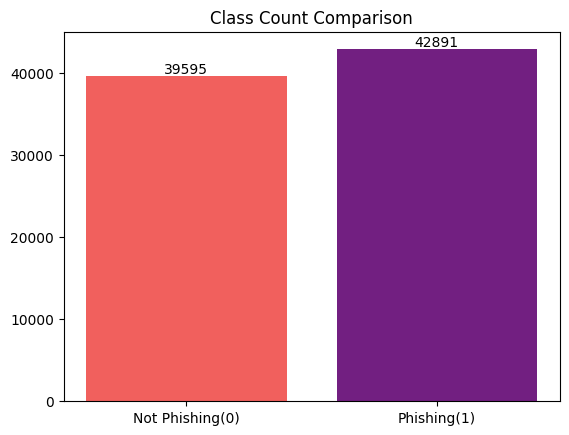

In [83]:
# Defining a color palette using the color_palette() function from seaborn
colors = sns.color_palette("magma", n_colors=2)[::-1]

# Counting entries with values 0 and 1
count_0 = phishing_df['label'].value_counts()[0]
count_1 = phishing_df['label'].value_counts()[1]

# Creating the bar chart with colors
plt.bar(['Not Phishing(0)', 'Phishing(1)'], [count_0, count_1], color=colors)

# Adding labels and title
plt.title('Class Count Comparison')

# Adding counts above the bars
for i, count in enumerate([count_0, count_1]):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Saving the chart as an image file (e.g., PNG)
plt.savefig('class_count_comparison.png', bbox_inches='tight')

# Displaying the chart
plt.show()


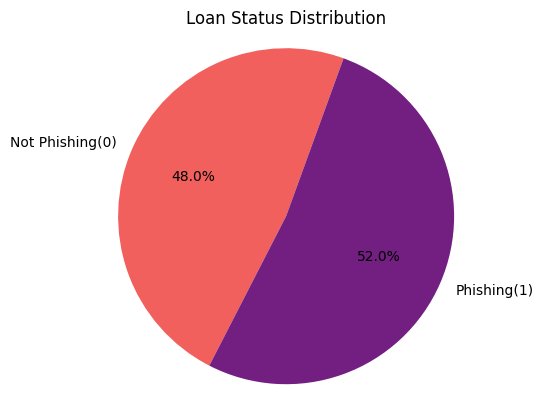

In [84]:
# Calculating the percentage of entries with values 0 and 1
porcentagem_0 = (count_0 / len(phishing_df)) * 100
porcentagem_1 = (count_1 / len(phishing_df)) * 100

# Creating the pie chart
labels = ['Not Phishing(0)', 'Phishing(1)']
sizes = [porcentagem_0, porcentagem_1]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=70, colors=colors)

# Adding a title
plt.title('Loan Status Distribution')

# Displaying the chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Saving the chart as an image file (e.g., PNG)
plt.savefig('loan_status_distribution.png', bbox_inches='tight')

plt.show()

# Step 2: Data Wrangling

In [85]:
# Create the ceas_df_clean DataFrame with the columns that will be used to generate text_combined.
ceas_df_clean = ceas_df[['sender', 'body', 'date', 'subject']]

ceas_df_clean

,sender,body,date,subject
0,Young Esposito <Young@iworld.de>,"Buck up, your troubles caused by small dimensi...","Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser
1,Mok <ipline's1983@icable.ph>,\nUpgrade your sex and pleasures with these te...,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10
3,Michael Parker <ivqrnai@pobox.com>,Would anyone object to removing .so from this ...,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...
4,Gretchen Suggs <externalsep1@loanofficertool.com>,\nWelcomeFastShippingCustomerSupport\nhttp://7...,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo
...,...,...,...,...
39149,CNN Alerts <charlene-detecton@btcmarketing.com>,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,"Fri, 08 Aug 2008 10:34:50 -0400",CNN Alerts: My Custom Alert
39150,CNN Alerts <idgetily1971@careplusnj.org>,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,"Fri, 08 Aug 2008 10:35:11 -0400",CNN Alerts: My Custom Alert
39151,Abhijit Vyas <xpojhbz@gmail.com>,Hello there ! \nGreat work on the slide show v...,"Fri, 08 Aug 2008 22:00:43 +0800",Slideshow viewer
39152,Joseph Brennan <vupzesm@columbia.edu>,"\nMail from sender , coming from intuit.com\ns...","Fri, 08 Aug 2008 09:00:46 -0500",Note on 2-digit years


### 2.1: Creating "text_combined" Column

In [86]:
ceas_df_clean['text_combined'] = ceas_df_clean[['sender', 'body', 'date', 'subject']].apply(lambda row: ' '.join(row.astype(str)), axis=1)

ceas_df_clean

,sender,body,date,subject,text_combined
0,Young Esposito <Young@iworld.de>,"Buck up, your troubles caused by small dimensi...","Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Young Esposito <Young@iworld.de> Buck up, your..."
1,Mok <ipline's1983@icable.ph>,\nUpgrade your sex and pleasures with these te...,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,Mok <ipline's1983@icable.ph> \nUpgrade your se...
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,Daily Top 10 <Karmandeep-opengevl@universalnet...
3,Michael Parker <ivqrnai@pobox.com>,Would anyone object to removing .so from this ...,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Michael Parker <ivqrnai@pobox.com> Would anyon...
4,Gretchen Suggs <externalsep1@loanofficertool.com>,\nWelcomeFastShippingCustomerSupport\nhttp://7...,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,Gretchen Suggs <externalsep1@loanofficertool.c...
...,...,...,...,...,...
39149,CNN Alerts <charlene-detecton@btcmarketing.com>,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,"Fri, 08 Aug 2008 10:34:50 -0400",CNN Alerts: My Custom Alert,CNN Alerts <charlene-detecton@btcmarketing.com...
39150,CNN Alerts <idgetily1971@careplusnj.org>,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,"Fri, 08 Aug 2008 10:35:11 -0400",CNN Alerts: My Custom Alert,CNN Alerts <idgetily1971@careplusnj.org> \n\nC...
39151,Abhijit Vyas <xpojhbz@gmail.com>,Hello there ! \nGreat work on the slide show v...,"Fri, 08 Aug 2008 22:00:43 +0800",Slideshow viewer,Abhijit Vyas <xpojhbz@gmail.com> Hello there !...
39152,Joseph Brennan <vupzesm@columbia.edu>,"\nMail from sender , coming from intuit.com\ns...","Fri, 08 Aug 2008 09:00:46 -0500",Note on 2-digit years,Joseph Brennan <vupzesm@columbia.edu> \nMail f...


In [87]:
print(f"Sample 1:\n{ceas_df_clean['text_combined'][0]}\n")
print(f"Sample 2:\n{ceas_df_clean['text_combined'][10561]}\n")
print(f"Sample 3:\n{ceas_df_clean['text_combined'][39152]}\n")

Sample 1:
Young Esposito <Young@iworld.de> Buck up, your troubles caused by small dimension will soon be over!
Become a lover no woman will be able to resist!
http://whitedone.com/


come. Even as Nazi tanks were rolling down the streets, the dreamersphilosopher or a journalist. He was still not sure.I do the same. Tue, 05 Aug 2008 16:31:02 -0700 Never agree to be a loser

Sample 2:
Ben Finney <ben+debian@benfinney.id.au> Walter Landry  writes:

> Ben Finney  wrote:
> > Stanislav Maslovski  writes:
> > =====
> >  Everyone is permitted to copy and distribute verbatim copies
> >  of this license document, but changing it is not allowed.
> > =====
> > 
> > So, even if they preserve the copyright notice, they still may not
> > redistribute changed copies of the GPL document. Only verbatim
> > copies may be redistributed.
> 
> Not quite.
[…]

You're right. So, for the purpose of the case under discussion, amend
the above to "Only verbatim copies may be redistrubted under the name
GNU Genera

### 2.2: Processing Data

In [88]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords (only once)
nltk.download('stopwords')

# Function to process the text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove emails and transform into 'name_domain' format
    text = re.sub(r'([a-zA-Z0-9._%+-]+)@([a-zA-Z0-9.-]+)', r'\1\2', text)
    
    # Remove URLs and transform into an appropriate format (without http:// or https://)
    text = re.sub(r'http[s]?://\S+', lambda x: x.group(0).replace("://", "").replace("/", ""), text)
    
    # Remove punctuation
    text = re.sub(r'[^a-z0-9\s]', '', text)
    
    # Get stopwords in English
    stop_words = set(stopwords.words('english'))
    
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yamas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [89]:
# Create a helper function to apply the main function without needing a lambda function
def apply_preprocess_text(dataframe, coluna):
    dataframe[coluna] = dataframe[coluna].astype(str)
    dataframe[coluna] = dataframe[coluna].apply(preprocess_text)

In [90]:
apply_preprocess_text(ceas_df_clean, 'text_combined')

### 2.3: Checking the Results

In [91]:
print("Texto 1:", ceas_df_clean['text_combined'][0])
print()
print("Texto 2:", ceas_df_clean['text_combined'][10561])
print()
print("Texto 3:", ceas_df_clean['text_combined'][39152])

Texto 1: young esposito youngiworldde buck troubles caused small dimension soon become lover woman able resist httpwhitedonecom come even nazi tanks rolling streets dreamersphilosopher journalist still surei tue 05 aug 2008 163102 0700 never agree loser

Texto 2: ben finney bendebianbenfinneyidau walter landry writes ben finney wrote stanislav maslovski writes everyone permitted copy distribute verbatim copies license document changing allowed even preserve copyright notice still may redistribute changed copies gpl document verbatim copies may redistributed quite youre right purpose case discussion amend verbatim copies may redistrubted name gnu general public license whatever insignificant important mahatma gandhi ben finney unsubscribe email debianlegalrequestlistsdebianorg subject unsubscribe trouble contact listmasterlistsdebianorg wed 06 aug 2008 105749 1000 upstream license edited gpl

Texto 3: joseph brennan vupzesmcolumbiaedu mail sender coming intuitcom servers 206154105168 16

In [92]:
print("Texto 1:", phishing_df['text_combined'][32626])
print()
print("Texto 2:", phishing_df['text_combined'][43187])
print()
print("Texto 3:", phishing_df['text_combined'][71778])

Texto 1: young esposito youngiworldde buck troubles caused small dimension soon become lover woman able resist httpwhitedonecom come even nazi tanks rolling streets dreamersphilosopher journalist still surei tue 05 aug 2008 163102 0700 never agree loser

Texto 2: ben finney bendebianbenfinneyidau walter landry writes ben finney wrote stanislav maslovski writes everyone permitted copy distribute verbatim copies license document changing allowed even preserve copyright notice still may redistribute changed copies gpl document verbatim copies may redistributed quite youre right purpose case discussion amend verbatim copies may redistrubted name gnu general public license whatever insignificant important mahatma gandhi _o__ ben finney unsubscribe email debianlegalrequestlistsdebianorg subject unsubscribe trouble contact listmasterlistsdebianorg wed 06 aug 2008 105749 1000 upstream license edited gpl

Texto 3: joseph brennan vupzesmcolumbiaedu mail sender coming intuitcom servers 2061541051